___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [4]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [6]:
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [7]:
# Bank of America
BAC = yf.download("BAC", start, end)

# CitiGroup
C = yf.download("C", start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS", start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [15]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [17]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  30.991053  31.056878  30.378867  30.885728  16296700  321.442719   
2006-01-04  30.661911  31.096365  30.576336  30.938380  17757900  315.508087   
2006-01-05  30.701410  30.826482  30.490766  30.661916  14970700  317.073242   
2006-01-06  30.655323  30.879133  30.510504  30.806723  12599800  317.073242   
2006-01-09  30.675087  30.918646  30.517105  30.754080  15619400  315.573303   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  322.029646  313.747405  319.551499  1537600  ...  31.934690   
2006-01-04  320.203544  315.312451  318.638399  1870960  ...  31.956600   
2006-01-05  318.116659  315.638514  315.899368  1143160  ...  32.044228   
2006-01-06  318.899242  314.334222  318.768805  1370210  ...  32.077065   
2006-01-09  317.855813  314.986376  316.942813  1680740  ...  32.416645   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.033271  31.074847  31.310344  5377000  18.675653  18.719562   
2006-01-04  32.465934  31.956600  32.148286  7977800  18.459040  18.628818   
2006-01-05  32.088042  31.775870  32.066135  5778000  18.438547  18.473673   
2006-01-06  32.230412  31.792276  32.186599  6889800  18.546856  18.602473   
2006-01-09  32.471413  32.104473  32.109951  4144500  18.543936  18.631753   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.262916  18.500021  11016400  
2006-01-04  18.362441  18.617109  10870000  
2006-01-05  18.330239  18.441474  10158000  
2006-01-06  18.374150  18.488311   8403800  
2006-01-09  18.473683  18.543936   5619600  

[5 rows x 30 columns]

** Set the column name levels **

In [20]:
# Drops the 3rd level (redundant bank ticker)
bank_stocks.columns = bank_stocks.columns.droplevel(2)

# Assigns proper level names
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [23]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.991053  31.056878  30.378867  30.885728  16296700  321.442719   
2006-01-04   30.661911  31.096365  30.576336  30.938380  17757900  315.508087   
2006-01-05   30.701410  30.826482  30.490766  30.661916  14970700  317.073242   
2006-01-06   30.655323  30.879133  30.510504  30.806723  12599800  317.073242   
2006-01-09   30.675087  30.918646  30.517105  30.754080  15619400  315.573303   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   322.029646  313.747405  319.551499  1537600  ...  31.934690   
2006-01-04   320.203544  315.312451  318.638399  1870960  ...  31.956600   
2006-01-05   318.116659  315.638514  315.899368  1143160  ...  32.044228   
2006-01-06   318.899242  314.334222  318.768805  1370210  ...  32.077065   
2006-01-09   317.855813  314.986376  316.942813  1680740  ...  32.416645   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.033271  31.074847  31.310344  5377000  18.675653  18.719562   
2006-01-04   32.465934  31.956600  32.148286  7977800  18.459040  18.628818   
2006-01-05   32.088042  31.775870  32.066135  5778000  18.438547  18.473673   
2006-01-06   32.230412  31.792276  32.186599  6889800  18.546856  18.602473   
2006-01-09   32.471413  32.104473  32.109951  4144500  18.543936  18.631753   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.262916  18.500021  11016400  
2006-01-04   18.362441  18.617109  10870000  
2006-01-05   18.330239  18.441474  10158000  
2006-01-06   18.374150  18.488311   8403800  
2006-01-09   18.473683  18.543936   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.478714
C      383.228302
GS     185.153198
JPM     53.603725
MS      50.061134
WFC     44.026569
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [29]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [32]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012030,0.016241,0.010586,-0.000157


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

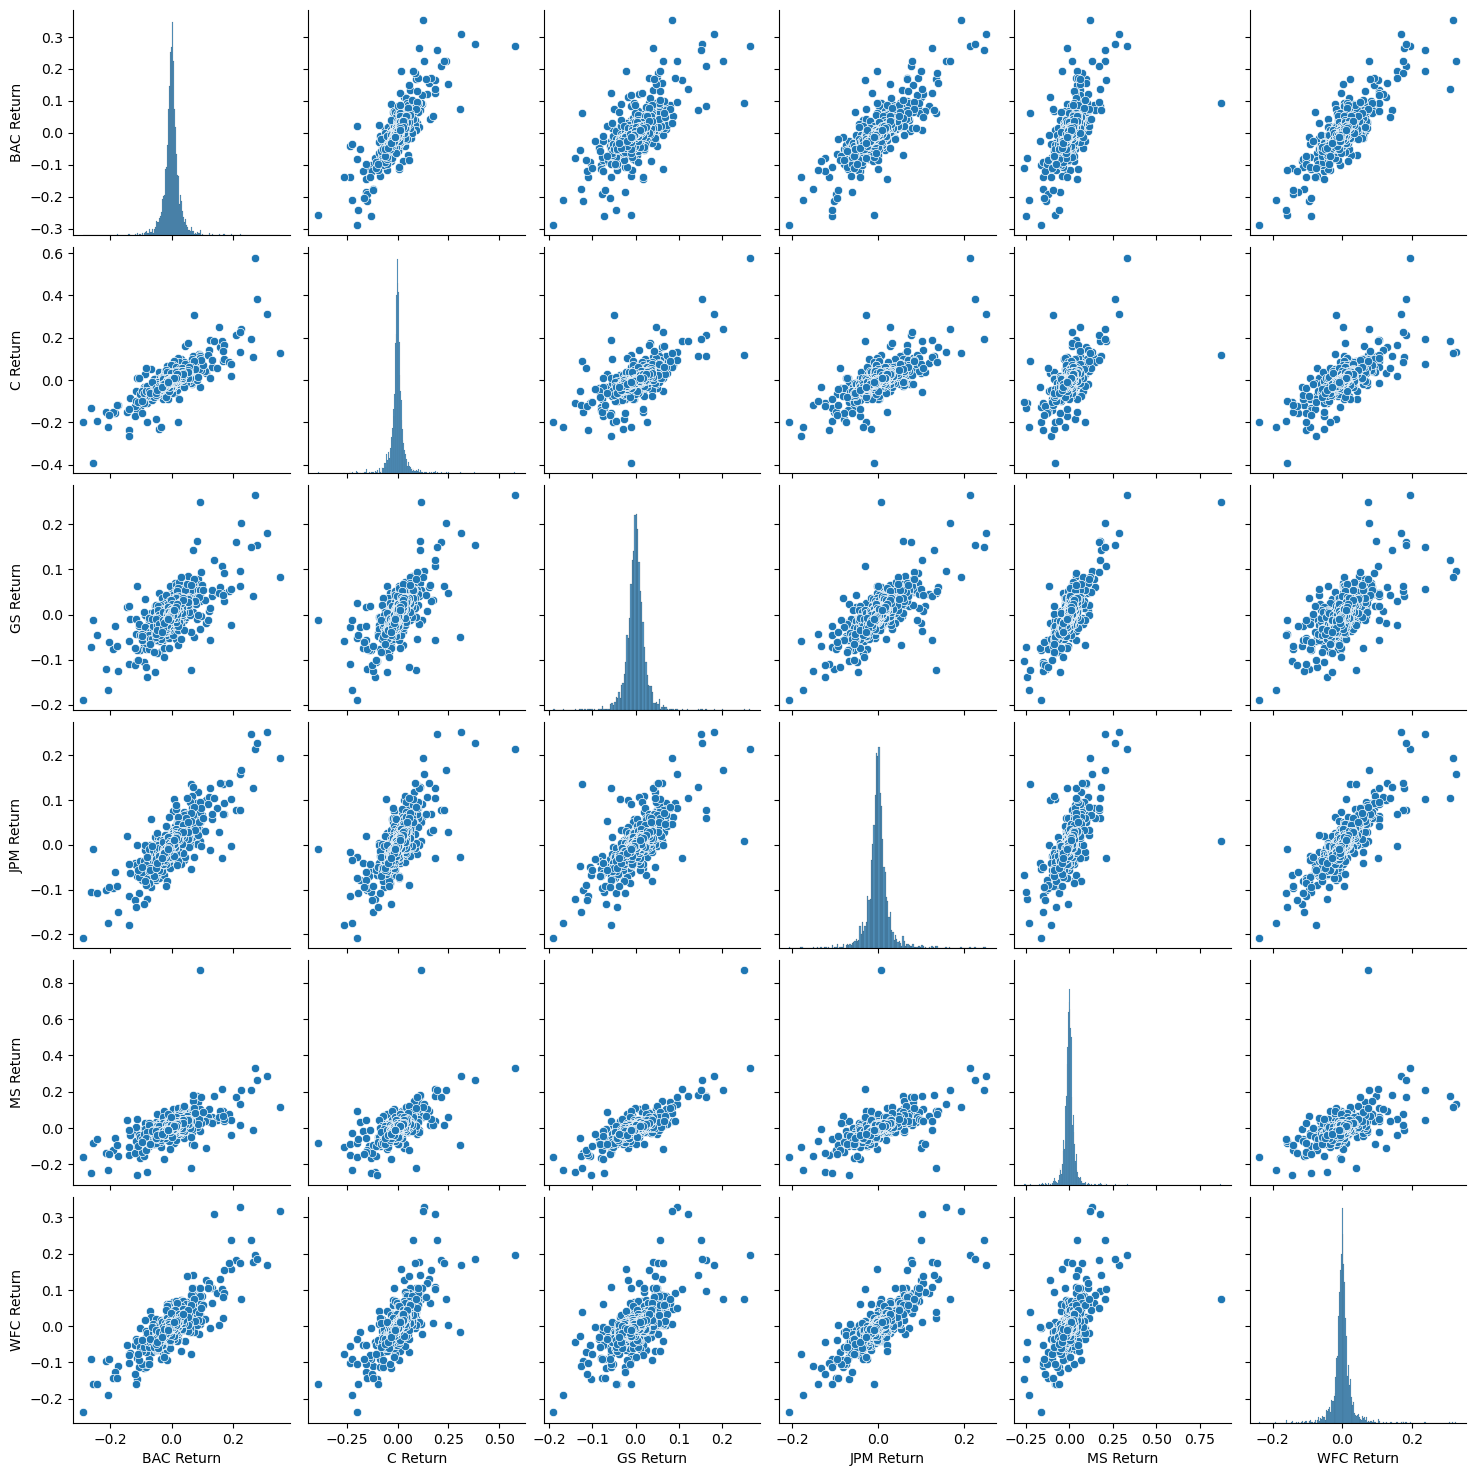

In [35]:
#returns[1:]
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns[1:])
plt.show()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [38]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [43]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [46]:
returns.std() # Citigroup riskiest

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [48]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/var/folders/vx/zh8x_n315xj0zhkgj9hbf_fc0000gn/T/ipykernel_5069/1569847069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


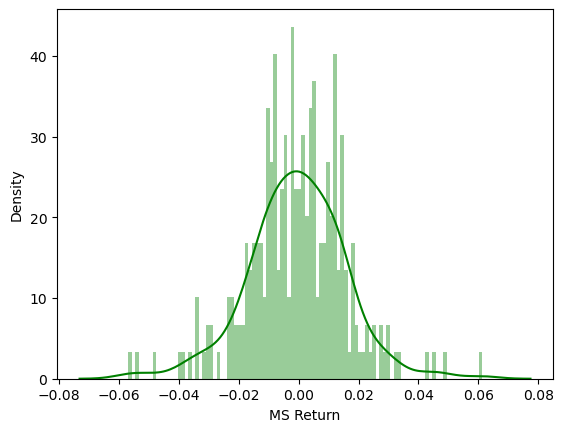

In [51]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/var/folders/vx/zh8x_n315xj0zhkgj9hbf_fc0000gn/T/ipykernel_5069/3291767074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


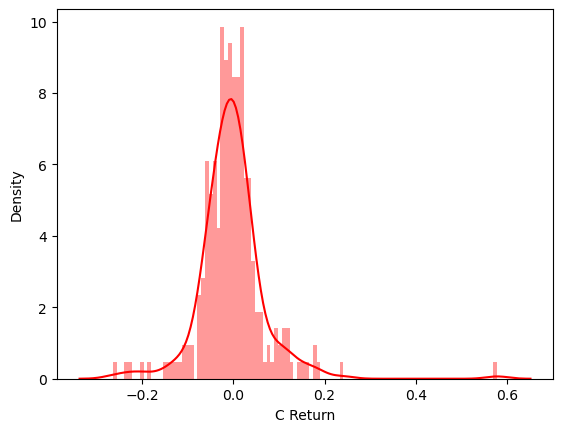

In [54]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [60]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

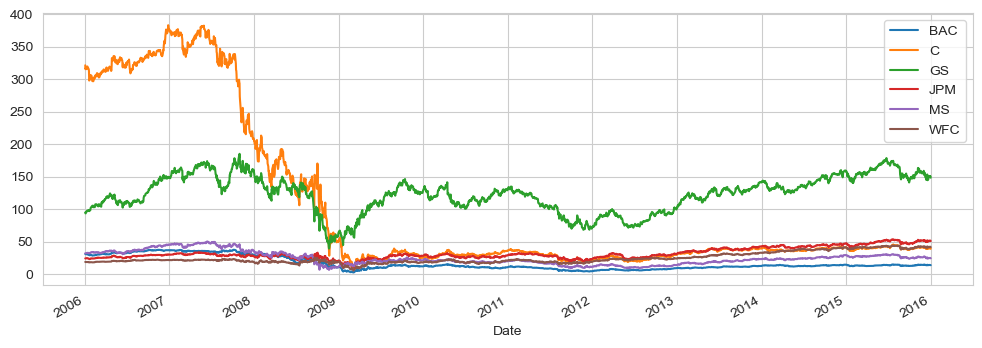

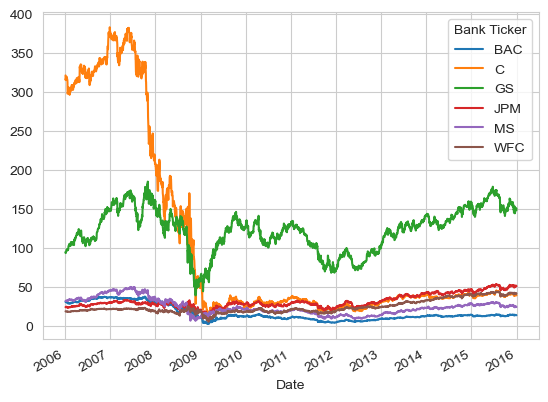

In [62]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



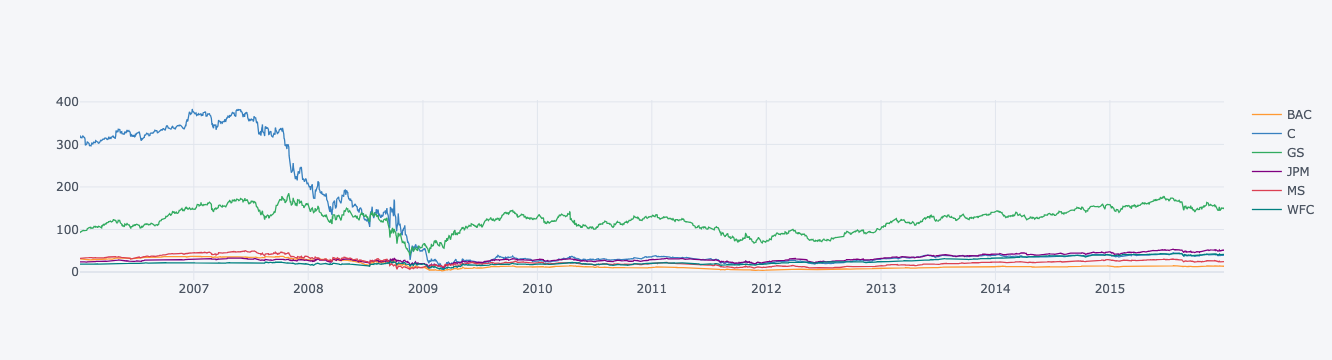

In [88]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
plt.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

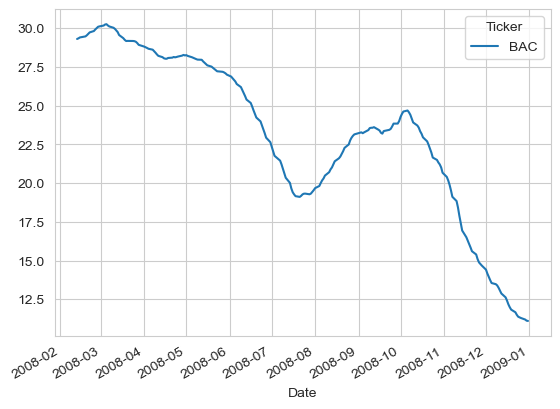

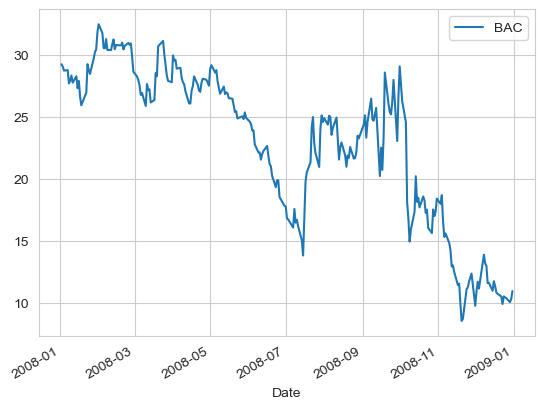

In [67]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

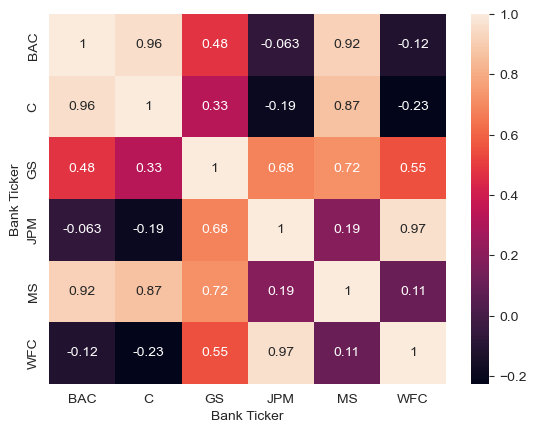

In [70]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

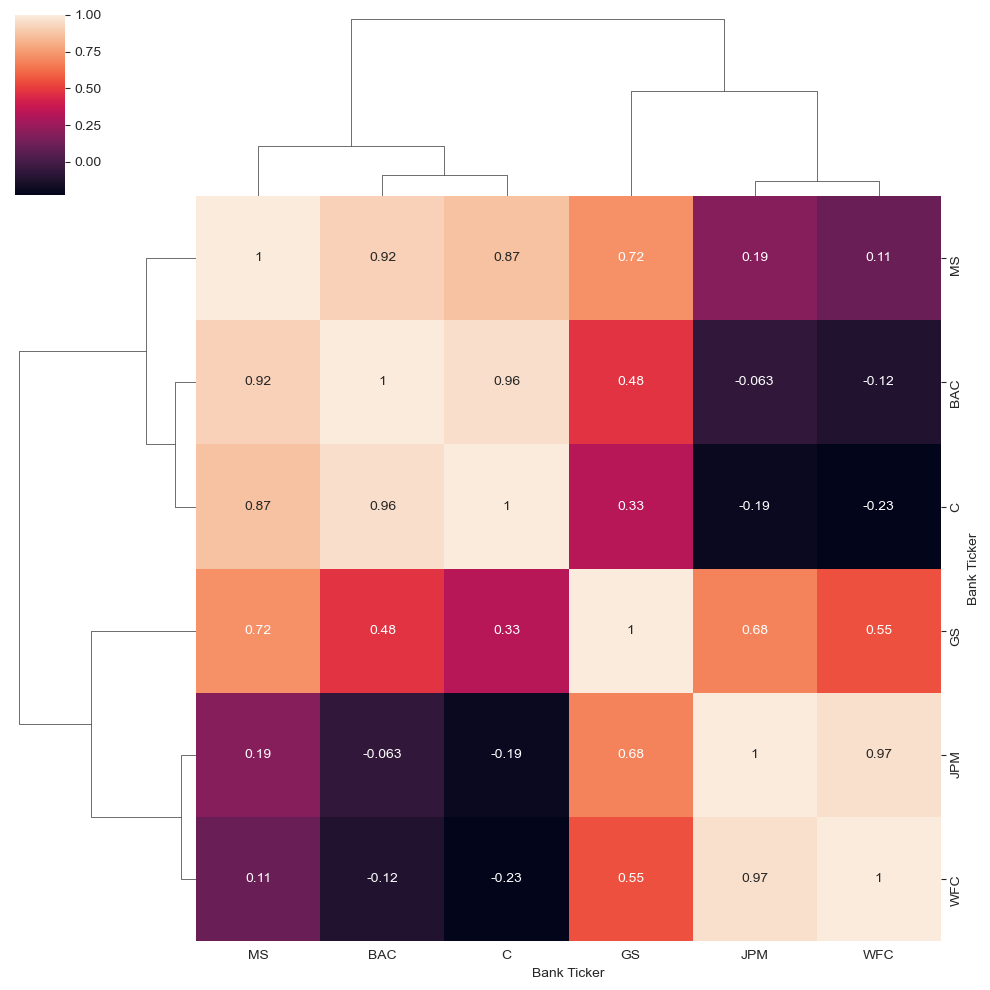

In [73]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

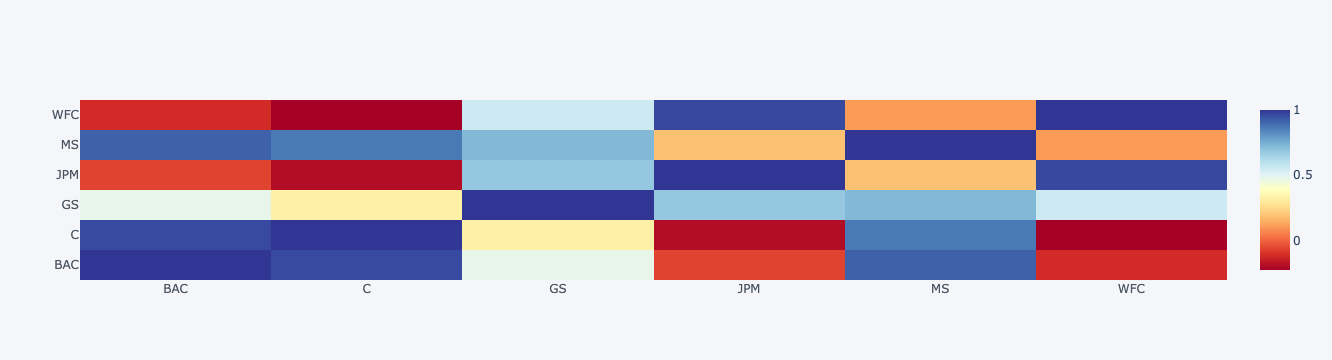

In [90]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')
plt.show()

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

[*********************100%***********************]  1 of 1 completed


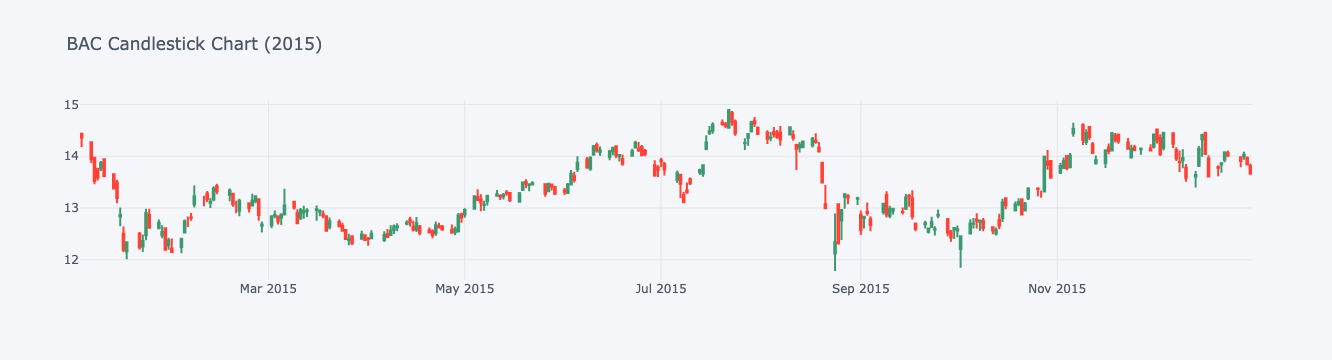

In [92]:
import yfinance as yf
import pandas as pd
import cufflinks as cf

cf.go_offline()

# Download data
BAC = yf.download("BAC", start="2015-01-01", end="2016-01-01")

# Extract OHLC and flatten any weird column format
BAC_candle = BAC[['Open', 'High', 'Low', 'Close']].copy()

# Fix column names if they’re not plain strings
BAC_candle.columns = [str(col) for col in BAC_candle.columns]

# Now plot
BAC_candle.iplot(kind='candle', title='BAC Candlestick Chart (2015)')
plt.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



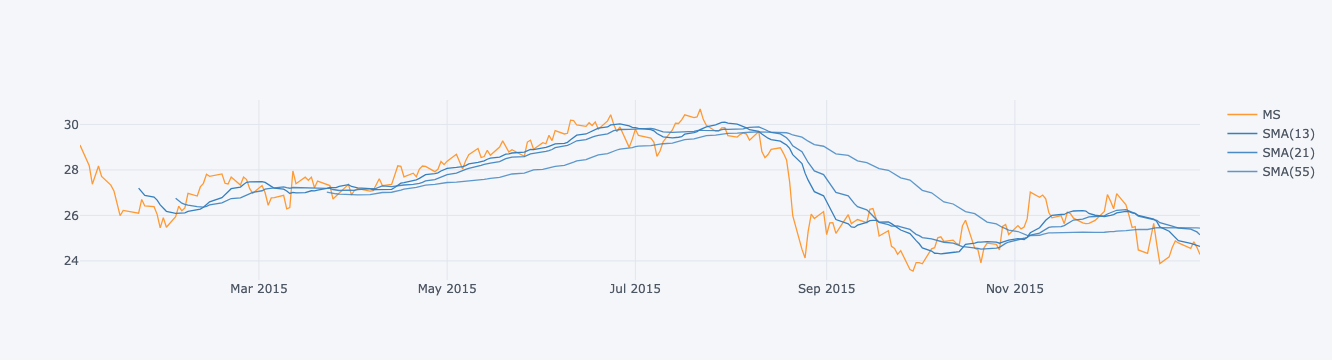

In [82]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



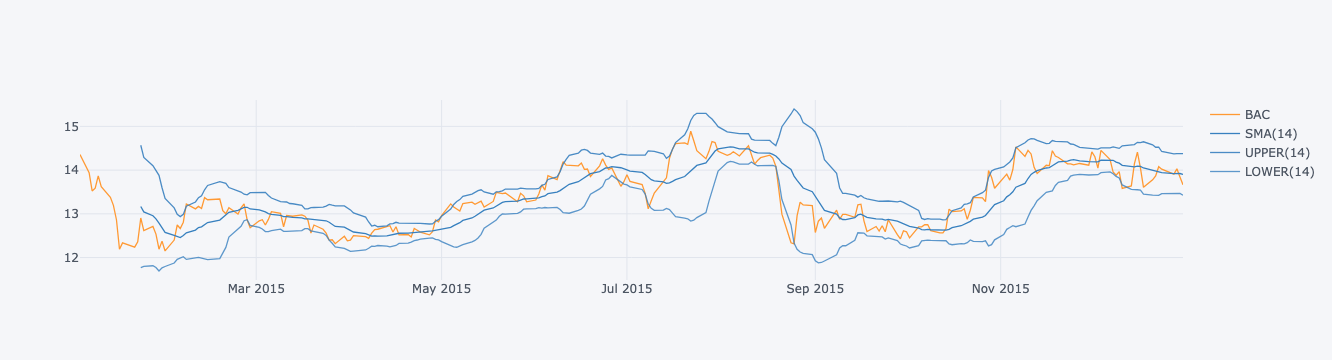

In [94]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')
plt.show()

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.